In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from math import sqrt
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import re as r

In [47]:
df_orig= pd.read_csv('df_base')

In [48]:
df= df_orig.head()
df.head(1)

,Unnamed: 0,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651


In [49]:
df= df_orig.drop(columns=['poster_path', 'original_language','homepage', 'imdb_id', 'overview', 'status', 'Keywords', 'tagline', 'cast', 'crew', 'production_companies', 'production_countries', 'spoken_languages'])

In [50]:
#need to get rid of nulls and replace with '0'
df= df.fillna(0)
#All films that beloing to a collection (book, franchise, etc.) assigned a 1

df.head()

,Unnamed: 0,id,belongs_to_collection,budget,genres,original_title,popularity,release_date,runtime,title,revenue
0,0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",Hot Tub Time Machine 2,6.575393,2/20/15,93.0,Hot Tub Time Machine 2,12314651
1,1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",The Princess Diaries 2: Royal Engagement,8.248895,8/6/04,113.0,The Princess Diaries 2: Royal Engagement,95149435
2,2,3,0,3300000,"[{'id': 18, 'name': 'Drama'}]",Whiplash,64.299990,10/10/14,105.0,Whiplash,13092000
3,3,4,0,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",Kahaani,3.174936,3/9/12,122.0,Kahaani,16000000
4,4,5,0,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",마린보이,1.148070,2/5/09,118.0,Marine Boy,3923970


In [51]:
# create date related features
df.release_date = pd.to_datetime(df.release_date)
df['release_year'] = df.release_date.dt.year
df['release_year'] = df.release_year.apply(lambda x: x-100 if x > 2020 else x)


In [54]:
df= df.drop(columns= ['release_date'])

In [56]:
#create a feature that is gross profit pct_profit
df['gross_profit']= df['revenue']- df['budget']

In [57]:
#Creating a pct profit column
df['pct_profit']= (df['gross_profit']/df['revenue']*100).round(2)

In [58]:
df.head()

,Unnamed: 0,id,belongs_to_collection,budget,genres,original_title,popularity,runtime,title,revenue,release_year,gross_profit,pct_profit
0,0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",Hot Tub Time Machine 2,6.575393,93.0,Hot Tub Time Machine 2,12314651,2015,-1685349,-13.69
1,1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",The Princess Diaries 2: Royal Engagement,8.248895,113.0,The Princess Diaries 2: Royal Engagement,95149435,2004,55149435,57.96
2,2,3,0,3300000,"[{'id': 18, 'name': 'Drama'}]",Whiplash,64.299990,105.0,Whiplash,13092000,2014,9792000,74.79
3,3,4,0,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",Kahaani,3.174936,122.0,Kahaani,16000000,2012,14800000,92.50
4,4,5,0,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",마린보이,1.148070,118.0,Marine Boy,3923970,2009,3923970,100.00


(array([  11.,   19.,   21.,   41.,   54.,   84.,  332.,  467.,  832.,
        1139.]),
 array([1921. , 1930.6, 1940.2, 1949.8, 1959.4, 1969. , 1978.6, 1988.2,
        1997.8, 2007.4, 2017. ]),
 <a list of 10 Patch objects>)

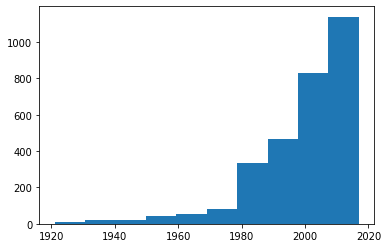

In [59]:
plt.hist(df['release_year'])

In [60]:
corr_matrix= df.corr()

In [61]:
corr_matrix['pct_profit'].sort_values(ascending=False)

pct_profit      1.000000
gross_profit    0.021035
revenue         0.019515
runtime         0.019130
id              0.016261
Unnamed: 0      0.016261
popularity      0.012813
budget          0.008671
release_year   -0.005409
Name: pct_profit, dtype: float64